###*Librerías:*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path_data = '/content/gdrive/MyDrive/AprendizajeAutomatico/Proyecto1/CK48/'

 ## 1) Generar los vectores característica de las imágenes

In [5]:
def Haar(imagen, cortes):
 for i in range(cortes):
   LL, (LH, HL, HH) = pywt.dwt2(imagen, 'haar')
   imagen = LL
 return imagen

def vectorizar(matrix):
  return matrix.flatten()

def preprocesar(imagenes):
  imagenes_vectorizadas = []
  for imagen in imagenes:
    imagenes_vectorizadas.append(vectorizar(Haar(imagen, 1)))
  return imagenes_vectorizadas

In [6]:
ANG_TRAIN_PATH = path_data + "anger"
CON_TRAIN_PATH = path_data + "contempt"
DIS_TRAIN_PATH = path_data + "disgust"
FEA_TRAIN_PATH = path_data + "fear"
HAP_TRAIN_PATH = path_data + "happy"
SAD_TRAIN_PATH = path_data + "sadness"
SUR_TRAIN_PATH = path_data + "surprise"

def get_imagenes(dir_path):
  imagenes = []
  for img_path in os.listdir(dir_path):
    img_full_path = os.path.join(dir_path, img_path)
    img = cv2.imread(img_full_path)
    imagenes.append(img)
  return imagenes

In [7]:
train_ang = preprocesar(get_imagenes(ANG_TRAIN_PATH))
train_con = preprocesar(get_imagenes(CON_TRAIN_PATH))
train_dis = preprocesar(get_imagenes(DIS_TRAIN_PATH))
train_fea = preprocesar(get_imagenes(FEA_TRAIN_PATH))
train_hap = preprocesar(get_imagenes(HAP_TRAIN_PATH))
train_sad = preprocesar(get_imagenes(SAD_TRAIN_PATH))
train_sur = preprocesar(get_imagenes(SUR_TRAIN_PATH))

In [8]:
train_ang = np.array(train_ang)
train_con = np.array(train_con)
train_dis = np.array(train_dis)
train_fea = np.array(train_fea)
train_hap = np.array(train_hap)
train_sad = np.array(train_sad)
train_sur = np.array(train_sur)

###*Creacion de la matriz x*

In [9]:
print(np.shape(train_ang))
print(np.shape(train_con))
print(np.shape(train_dis))
print(np.shape(train_fea))
print(np.shape(train_hap))
print(np.shape(train_sad))
print(np.shape(train_sur))

(135, 2304)
(54, 2304)
(177, 2304)
(75, 2304)
(207, 2304)
(84, 2304)
(249, 2304)


In [10]:
m_train = len(train_ang) + len(train_con) \
  + len(train_dis) + len(train_fea) + len(train_hap) \
  + len(train_sad) + len(train_sur) 
k_train = np.shape(train_ang)[1]

In [11]:
X = np.concatenate((train_ang, train_con,train_dis,train_fea,train_hap,train_sad,train_sur)).reshape(m_train,k_train)

###*Creacion de las etiquetas y*: 
*   0: anger
*   1: contempt
*   2: disgust
*   3: fear
*   4: happy
*   5: sadness
*   6: surprise





In [12]:
y1_train = np.zeros(len(train_ang))
y2_train = np.ones(len(train_con))
y3_train = np.full(len(train_dis), 2)
y4_train = np.full(len(train_fea), 3)
y5_train = np.full(len(train_hap), 4)
y6_train = np.full(len(train_sad), 5)
y7_train = np.full(len(train_sur), 6)

y = np.concatenate((y1_train, y2_train,y3_train,y4_train,y5_train,y6_train,y7_train)).reshape(m_train,1)
y.shape

(981, 1)

In [13]:
print(np.shape(X))
X

(981, 2304)


array([[225., 225., 124., ...,   4.,  28.,  28.],
       [ 40.,  40.,  25., ..., 293., 308., 308.],
       [ 34.,  34.,  29., ..., 299., 309., 309.],
       ...,
       [254., 254., 162., ..., 101., 107., 107.],
       [ 89.,  89.,  82., ...,   2.,  49.,  49.],
       [ 52.,  52.,  45., ..., 294., 290., 290.]])

In [14]:
print(np.shape(y))
np.ravel(y)

(981, 1)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [15]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
print(X.shape)
print(y.shape)
df_images = pd.concat([X,y], axis=1)
print(df_images.shape)

(981, 2304)
(981, 1)
(981, 2305)


## 2) Modelo KNN

###*Modelo KNN y cálculo de error y bias*: 

In [16]:
test_size=0.20
semilla=333
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=semilla)

In [17]:
def error_y_bias(y_pred,y_test):
  #Bias
  bias = np.mean(np.ravel(y_test) - np.ravel(y_pred))
  #Error
  error = np.mean(np.ravel(y_pred) != np.ravel(y_test))
  #Varianza Error
  varError = np.std(np.ravel(y_pred) != np.ravel(y_test))
  #Varianza Predicción
  var = np.mean(np.ravel(y_pred)**2) - np.mean(np.ravel(y_pred))**2

  return bias, error, varError, var

In [18]:
def KNN_model(X,y,n_neighbors):
  classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
  classifier.fit(X_train, np.ravel(y_train))
  return classifier

## 3) Experimentación del modelo con neighbors desde 2 a 50

In [90]:
min_neighbors = 2
max_neighbors = 50
error = []
varError = []
bias = []
varianza = []
accuracy = []

for i in range(min_neighbors, max_neighbors):
    knn = KNN_model(X_train, y_train,n_neighbors=i)
    pred_i = knn.predict(X_test)
    b,e,ve,v = error_y_bias(pred_i,y_test)
    bias.append(b)
    error.append(e)
    varError.append(ve)
    varianza.append(v)
    accuracy.append(accuracy_score(y_test, pred_i))

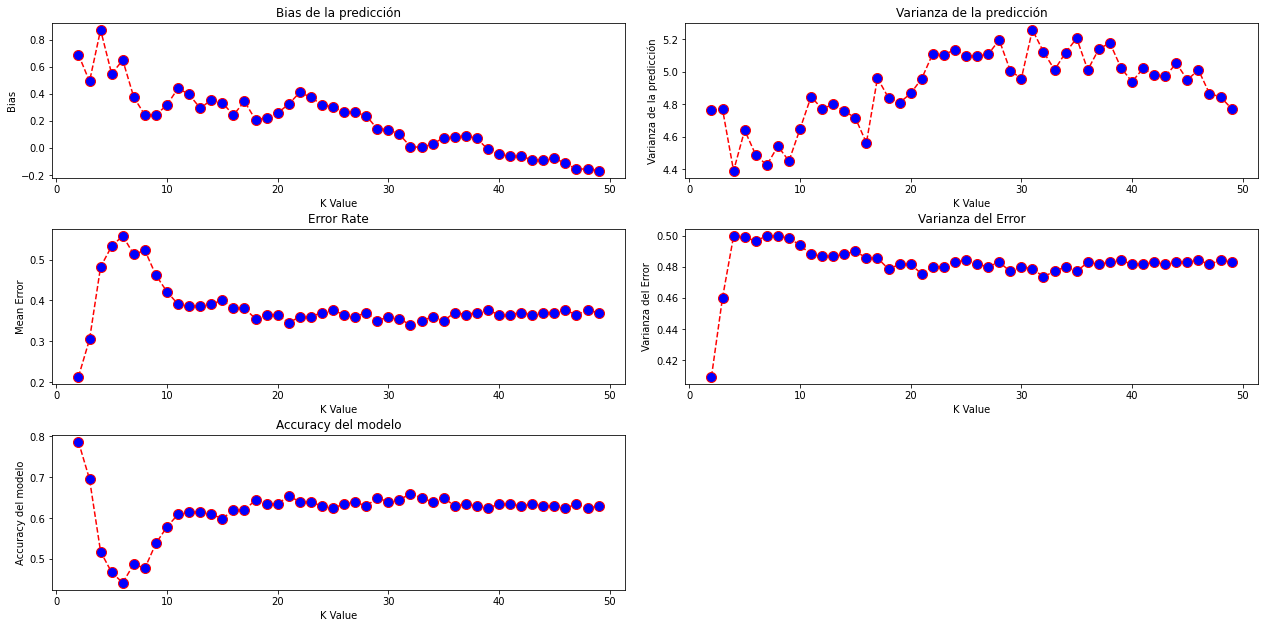

In [91]:
fig, axs = plt.subplots(3, 2,figsize=(18,9))
fig.tight_layout(pad=3.0)

axs[0, 0].plot(range(min_neighbors, max_neighbors), bias, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs[0, 0].set_title('Bias de la predicción')
axs[0, 0].set_xlabel('K Value')
axs[0, 0].set_ylabel('Bias')


axs[0, 1].plot(range(min_neighbors, max_neighbors), varianza, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs[0, 1].set_title('Varianza de la predicción')
axs[0, 1].set_xlabel('K Value')
axs[0, 1].set_ylabel('Varianza de la predicción')

axs[1, 0].plot(range(min_neighbors, max_neighbors), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs[1, 0].set_title('Error Rate')
axs[1, 0].set_xlabel('K Value')
axs[1, 0].set_ylabel('Mean Error')


axs[1, 1].plot(range(min_neighbors, max_neighbors), varError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs[1, 1].set_title('Varianza del Error')
axs[1, 1].set_xlabel('K Value')
axs[1, 1].set_ylabel('Varianza del Error')

axs[2, 0].plot(range(min_neighbors, max_neighbors), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs[2, 0].set_title('Accuracy del modelo')
axs[2, 0].set_xlabel('K Value')
axs[2, 0].set_ylabel('Accuracy del modelo')

axs[2, 1].set_visible(False)


## 4) Cross validation usando K-Fold y Bootstrap

###*K-fold:* 

In [75]:
def kfold(n_neighbors, n_splits): 
  knn_kf = KNeighborsClassifier(n_neighbors=n_neighbors)
  kf_scores = cross_val_score(knn_kf, X,np.ravel(y), cv=KFold(n_splits=n_splits,shuffle = True))
  #kf_scores = cross_val_score(knn_kf, X,np.ravel(y), cv=KFold(n_splits=5,shuffle = True, random_state=semilla))
  knn_kf.fit(X_train, np.ravel(y_train))
  predictions = knn_kf.predict(X_test)
  b,e,ve,v = error_y_bias(predictions,y_test)
  print('****************')
  print('K-fold Cross validation con ',n_splits,' splits')
  print('  Ejecutando KNN con ',n_neighbors,' neighbors y se obtuvo:')
  print("    - %0.2f bias con varianza de %0.2f" % (b, v))
  print("    - %0.2f error con varianza de %0.2f" % (e, ve))
  print("    - %0.2f accuracy score con desviación estándar de %0.2f" % (kf_scores.mean(), kf_scores.std()))
  print('****************')

In [76]:
kfold(n_neighbors = 2, n_splits =5)
kfold(n_neighbors = 3, n_splits =5)


****************
K-fold Cross validation con  5  splits
  Ejecutando KNN con  2  neighbors y se obtuvo:
    - 0.69 bias con varianza de 4.76
    - 0.21 error con varianza de 0.41
    - 0.81 accuracy score con desviación estándar de 0.02
****************
****************
K-fold Cross validation con  5  splits
  Ejecutando KNN con  3  neighbors y se obtuvo:
    - 0.49 bias con varianza de 4.77
    - 0.30 error con varianza de 0.46
    - 0.70 accuracy score con desviación estándar de 0.03
****************


###*Bootstrap:*

In [56]:
def bootstrap(n_neighbors, n_iterations):   
  n_size = int(len(X) * (1 - test_size)) 
  values = df_images.values
  bo_scores = list()
  for i in range(n_iterations):
      train = resample(values, n_samples = n_size, replace=True, stratify=y) 
      test = np.array([s for s in values if s.tolist() not in train.tolist()]) 
      knn_bo = KNeighborsClassifier(n_neighbors=n_neighbors)
      knn_bo.fit(train[:,:-1], train[:,-1])
      predictions = knn_bo.predict(test[:,:-1]) 
      score = accuracy_score(test[:,-1], predictions) 
      bo_scores.append(score)
      b,e,ve,v = error_y_bias(predictions,test[:,-1])
  
  print('****************')
  print('Bootstrap Cross validation con ',n_iterations,' iteraciones')
  print('  Ejecutando KNN con ',n_neighbors,' neighbors y se obtuvo:')
  print("    - %0.2f bias con varianza de %0.2f" % (b, v))
  print("    - %0.2f error con varianza de %0.2f" % (e, ve))
  print("    - %0.2f accuracy score con desviación estándar de %0.2f" % (np.mean(bo_scores), np.std(bo_scores)))
  print('****************')


In [74]:
bootstrap(n_neighbors=2, n_iterations=4)
bootstrap(n_neighbors=3, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando KNN con  2  neighbors y se obtuvo:
    - 0.36 bias con varianza de 4.18
    - 0.31 error con varianza de 0.46
    - 0.70 accuracy score con desviación estándar de 0.02
****************
****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando KNN con  3  neighbors y se obtuvo:
    - 0.22 bias con varianza de 4.41
    - 0.36 error con varianza de 0.48
    - 0.63 accuracy score con desviación estándar de 0.02
****************


## 5) Análisis de resultados para KNN con 3 y 2 neighbors

###*Ejecutando KNN con 3 neighbors y cálculo de bias, error, varianza y accuracy* 

In [94]:
knn = KNN_model(X_train, np.ravel(y_train),n_neighbors=3)
y_pred = knn.predict(X_test)

In [95]:
print("El bias calculado es %0.2f" %accuracy_score(y_test, y_pred))

El bias calculado es 0.70


In [96]:
b,e,ve,v = error_y_bias(y_pred,y_test)
print("El bias calculado es %0.2f" %b)
print("El error calculado es %0.2f" %e)
print("La varianza del error es %0.2f" %ve)
print("La varianza es %0.2f" %v)

El bias calculado es 0.49
El error calculado es 0.30
La varianza del error es 0.46
La varianza es 4.77


###*Ejecutando KNN con 2 neighbors y cálculo de bias, error, varianza y accuracy* 

*   Elemento de la lista
*   Elemento de la lista



In [97]:
knn = KNN_model(X_train, np.ravel(y_train),n_neighbors=2)
y_pred = knn.predict(X_test)


In [98]:
print("El bias calculado es %0.2f" %accuracy_score(y_test, y_pred))

El bias calculado es 0.79


In [99]:
b,e,ve,v = error_y_bias(y_pred,y_test)
print("El bias calculado es %0.2f" %b)
print("El error calculado es %0.2f" %e)
print("La varianza del error es %0.2f" %ve)
print("La varianza es %0.2f" %v)


El bias calculado es 0.69
El error calculado es 0.21
La varianza del error es 0.41
La varianza es 4.76


###*Matriz de confusión para KNN con 2 neighbors* 

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73        29
         1.0       1.00      1.00      1.00        16
         2.0       0.77      0.83      0.80        36
         3.0       0.40      0.80      0.53         5
         4.0       0.94      0.76      0.84        42
         5.0       0.69      0.64      0.67        14
         6.0       1.00      0.64      0.78        55

    accuracy                           0.79       197
   macro avg       0.77      0.81      0.76       197
weighted avg       0.85      0.79      0.79       197



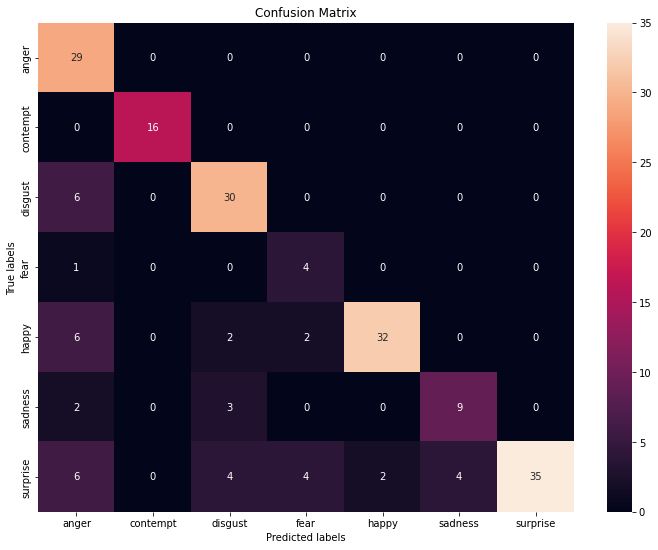

In [88]:
fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']); 
ax.yaxis.set_ticklabels(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']);